<a href="https://colab.research.google.com/github/Fuad-Khan/Religious-Harassment-Models/blob/main/distilbert_bangla_Religious_Harassment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Install Required Packages
!pip install -q transformers datasets scikit-learn pandas

# ✅ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from transformers import (
    DistilBertTokenizer,
    TFDistilBertForSequenceClassification,
    create_optimizer
)
from google.colab import files
import io

# ✅ Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric.csv"
df = pd.read_csv(file_path)


# ✅ Prepare Text and Labels
texts = df['comment'].astype(str).tolist()
labels = df['label'].tolist()

# ✅ Load Tokenizer and Model (DistilBERT)
model_name = "distilbert-base-multilingual-cased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# ✅ Tokenize Texts
tokens = tokenizer(
    texts,
    max_length=64,  # shorter to save memory
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)

# ✅ Convert tensors to numpy for splitting
input_ids = tokens['input_ids'].numpy()
attention_masks = tokens['attention_mask'].numpy()
labels = np.array(labels)

# ✅ Train/Test Split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

# ✅ Load DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ✅ Optimizer
batch_size = 16
num_epochs = 2
num_train_steps = int(len(X_train_ids) / batch_size * num_epochs)
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

# ✅ Compile Model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# ✅ Train the Model
history = model.fit(
    [X_train_ids, X_train_mask],
    np.array(y_train),
    validation_split=0.1,
    epochs=num_epochs,
    batch_size=batch_size
)

# ✅ Evaluate the Model
y_pred = model.predict([X_test_ids, X_test_mask]).logits
y_pred_classes = np.argmax(y_pred, axis=1)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ✅ Save Model and Tokenizer
model.save_pretrained("/content/drive/MyDrive/Research Paper/Models/distilbert-bangla-model/distilbert-bangla-model")
tokenizer.save_pretrained("/content/drive/MyDrive/Research Paper/Models/distilbert-bangla-model/distilbert-bangla-model")

Saving Preprocessed_religious_comments.csv to Preprocessed_religious_comments.csv


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
1032/1032 [==============================] - 8312s 8s/step - loss: 0.2361 - sparse_categorical_accuracy: 0.8992 - val_loss: 0.1448 - val_sparse_categorical_accuracy: 0.9471
Epoch 2/2
144/144 [==============================] - 509s 4s/step

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3043
           1       0.92      0.92      0.92      1541

    accuracy                           0.95      4584
   macro avg       0.94      0.94      0.94      4584
weighted avg       0.95      0.95      0.95      4584



('distilbert-bangla-model/tokenizer_config.json',
 'distilbert-bangla-model/special_tokens_map.json',
 'distilbert-bangla-model/vocab.txt',
 'distilbert-bangla-model/added_tokens.json')

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Load model and tokenizer from local directory
model_path = "distilbert-bangla-model"
model = TFDistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_path)


Some layers from the model checkpoint at distilbert-bangla-model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-bangla-model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def predict_comment(comment_text):
    # Tokenize the input comment
    tokens = tokenizer(
        comment_text,
        max_length=64,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

    # Predict using the model
    logits = model(tokens).logits
    predicted_class = np.argmax(logits, axis=1).item()

    return predicted_class


In [ ]:
comment = "এই মন্তব্যটি খুব খারাপ।"
predicted_label = predict_comment(comment)
print(f"Predicted Label: {predicted_label}")


Predicted Label: 0


In [ ]:
comments = [
    "আপনার পোস্টটি খুব তথ্যবহুল ছিল। ধন্যবাদ।",
    "তুমি কিছুই জানো না, বাজে কথা বলো না।",
    "Great work! Keep it up!",
    "এটা একটা বোকামির পোস্ট।",
]

for text in comments:
    label = predict_comment(text)
    print(f"Comment: {text}\nPredicted Label: {label}\n")


Comment: আপনার পোস্টটি খুব তথ্যবহুল ছিল। ধন্যবাদ।
Predicted Label: 0

Comment: তুমি কিছুই জানো না, বাজে কথা বলো না।
Predicted Label: 0

Comment: Great work! Keep it up!
Predicted Label: 0

Comment: এটা একটা বোকামির পোস্ট।
Predicted Label: 0



# distilbert-bangla-3class

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTr

Epoch 1/3
1166/1166 [==============================] - 9406s 8s/step - loss: 0.4496 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.3142 - val_sparse_categorical_accuracy: 0.8658
Epoch 2/3
1166/1166 [==============================] - 9258s 8s/step - loss: 0.2470 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.2684 - val_sparse_categorical_accuracy: 0.8967
Epoch 3/3
162/162 [==============================] - 558s 3s/step

✅ Classification Report:
                      precision    recall  f1-score   support

       Not Religious       0.94      0.95      0.95      2544
           Religious       0.80      0.86      0.83      1104
Religious Harassment       0.92      0.85      0.89      1532

            accuracy                           0.90      5180
           macro avg       0.89      0.89      0.89      5180
        weighted avg       0.91      0.90      0.90      5180



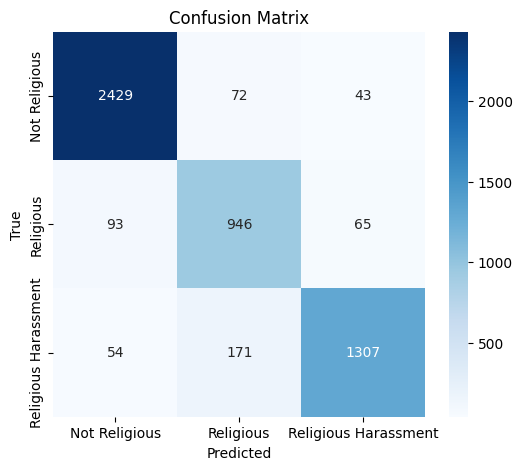

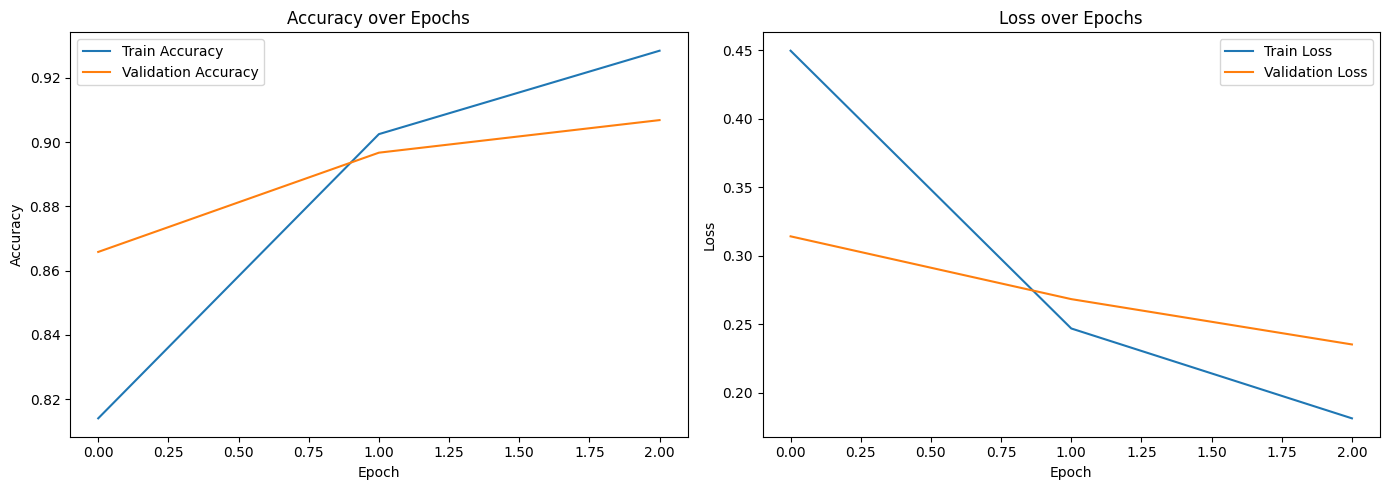

✅ Model and tokenizer saved.


In [1]:
# ✅ Install Required Packages
!pip install -q transformers datasets scikit-learn pandas matplotlib seaborn

# ✅ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from transformers import (
    DistilBertTokenizer,
    TFDistilBertForSequenceClassification,
    create_optimizer
)
from google.colab import files
import io

# ✅ Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# ✅ Prepare Texts and Labels
texts = df['comment'].astype(str).tolist()
labels = df['label_numeric'].astype(int).tolist()

# ✅ Tokenize Texts using Multilingual DistilBERT
model_name = "distilbert-base-multilingual-cased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

tokens = tokenizer(
    texts,
    max_length=64,
    truncation=True,
    padding='max_length',
    return_tensors='tf'
)

input_ids = tokens['input_ids'].numpy()
attention_masks = tokens['attention_mask'].numpy()
labels = np.array(labels)

# ✅ Train-Test Split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

# ✅ Load Model with 3 Output Labels
model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# ✅ Optimizer & Learning Schedule
batch_size = 16
num_epochs = 3
num_train_steps = int(len(X_train_ids) / batch_size * num_epochs)
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

# ✅ Compile Model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# ✅ Train Model
history = model.fit(
    [X_train_ids, X_train_mask],
    y_train,
    validation_split=0.1,
    epochs=num_epochs,
    batch_size=batch_size
)

# ✅ Predict
y_pred = model.predict([X_test_ids, X_test_mask]).logits
y_pred_classes = np.argmax(y_pred, axis=1)

# ✅ Classification Report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["Not Religious", "Religious", "Religious Harassment"]))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
labels_text = ['Not Religious', 'Religious', 'Religious Harassment']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_text, yticklabels=labels_text)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Training Accuracy & Loss Visualization
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Save Model & Tokenizer
model.save_pretrained("/content/drive/MyDrive/Research Paper/Models/distilbert-bangla-model/Riligious_3class_distilbert-bangla-model")
tokenizer.save_pretrained("/content/drive/MyDrive/Research Paper/Models/distilbert-bangla-model/3class_distilbert-bangla-model")

print("✅ Model and tokenizer saved.")
